Installations

In [ ]:
!pip install ultralytics

from IPython import display
display.clear_output()
!yolo checks

Ultralytics YOLOv8.2.2 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 29.0/78.2 GB disk)

OS                  Linux-6.1.58+-x86_64-with-glibc2.35
Environment         Colab
Python              3.10.12
Install             pip
RAM                 12.67 GB
CPU                 Intel Xeon 2.30GHz
CUDA                12.1

matplotlib          ✅ 3.7.1>=3.3.0
opencv-python       ✅ 4.8.0.76>=4.6.0
pillow              ✅ 9.4.0>=7.1.2
pyyaml              ✅ 6.0.1>=5.3.1
requests            ✅ 2.31.0>=2.23.0
scipy               ✅ 1.11.4>=1.4.1
torch               ✅ 2.2.1+cu121>=1.8.0
torchvision         ✅ 0.17.1+cu121>=0.9.0
tqdm                ✅ 4.66.2>=4.64.0
psutil              ✅ 5.9.5
py-cpuinfo          ✅ 9.0.0
thop                ✅ 0.1.1-2209072238>=0.1.1
pandas              ✅ 2.0.3>=1.1.4
seaborn             ✅ 0.13.1>=0.11.0


Importing files

In [ ]:
import os
Home = os.getcwd()
print(Home)

/content


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

Training

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="jstNhD4O0HGQvX35bwEW")
project = rf.workspace("retailobjectdetection").project("ui-ux_object_detection")
version = project.version(1)
dataset = version.download("yolov5")

loading Roboflow workspace...
loading Roboflow project...


In [ ]:
%cd {Home}
#!yolo task = detect mode=train model=yolov8n.pt data=content/cyst_identification-1/data.yaml epochs=15 imgsz=640
!yolo task=detect mode=train model=yolov8n.pt data={dataset.location}/data.yaml epochs=150 imgsz=640

/content
Ultralytics YOLOv8.2.2 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/UI/UX_Object_detection-1/data.yaml, epochs=150, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=

In [ ]:
!ls {Home}/runs/detect/train3/

args.yaml					    P_curve.png		 train_batch1961.jpg
confusion_matrix_normalized.png			    PR_curve.png	 train_batch1962.jpg
confusion_matrix.png				    R_curve.png		 train_batch1.jpg
events.out.tfevents.1713538081.3af19cacaba1.5499.0  results.csv		 train_batch2.jpg
F1_curve.png					    results.png		 val_batch0_labels.jpg
labels_correlogram.jpg				    train_batch0.jpg	 val_batch0_pred.jpg
labels.jpg					    train_batch1960.jpg  weights


Testing

In [ ]:
%cd {Home}
!yolo task=detect mode=predict model={Home}/runs/detect/train3/weights/best.pt conf=0.25 source={dataset.location}/valid/images save=true

/content
Ultralytics YOLOv8.2.2 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3007403 parameters, 0 gradients, 8.1 GFLOPs

image 1/8 /content/UI/UX_Object_detection-1/valid/images/19b_png.rf.14887ce1008228d57965961b44764489.jpg: 640x640 1 Search Bar, 7 Texts, 2 buttons, 2 images, 11.1ms
image 2/8 /content/UI/UX_Object_detection-1/valid/images/1a_png.rf.8a658eb4030d941f626558de07ccfedd.jpg: 640x640 1 Text, 1 button, 1 image, 3 input fields, 7.6ms
image 3/8 /content/UI/UX_Object_detection-1/valid/images/1b_png.rf.b656bbf75793abe345352dbcf7e15a99.jpg: 640x640 10 Texts, 10 buttons, 3 images, 8.6ms
image 4/8 /content/UI/UX_Object_detection-1/valid/images/22_jpg.rf.1909b435909e674df6ebd0f6a74ababa.jpg: 640x640 6 Texts, 3 buttons, 4 input fields, 7.4ms
image 5/8 /content/UI/UX_Object_detection-1/valid/images/26b_png.rf.aed1602c59c3082e3fcf5a55a1da0e70.jpg: 640x640 3 Texts, 1 button, 1 image, 7.5ms
image 6/8 /content/UI/UX_Object_detection-1/

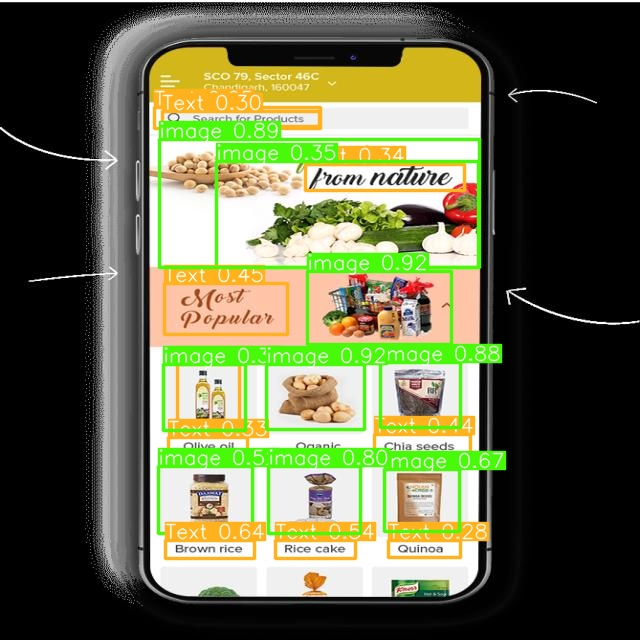

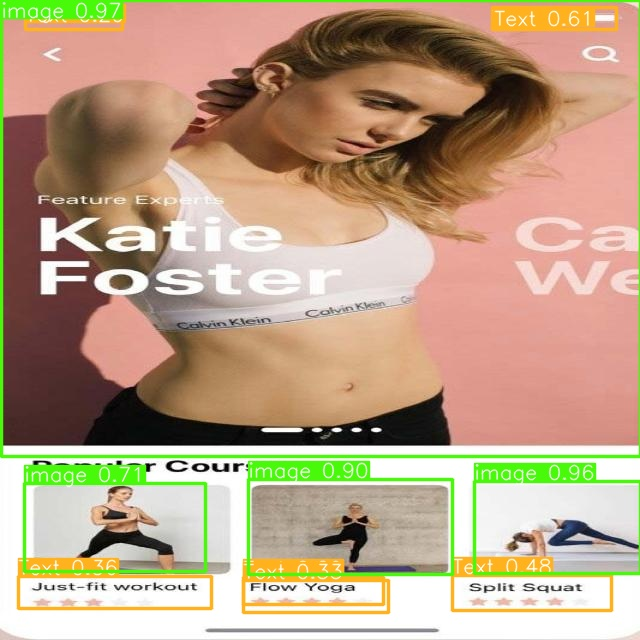

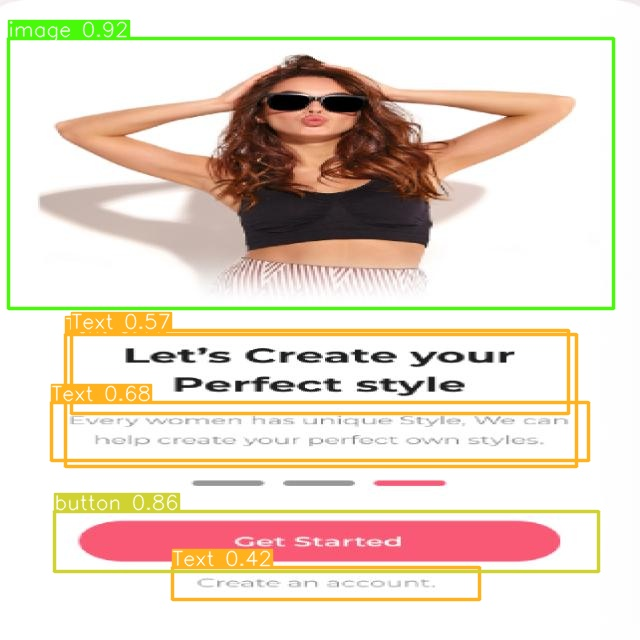

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{Home}/runs/detect/predict/*.jpg')[:3]:
      display(Image(filename=image_path, height=600))
      print("\n")

Final Detection code

In [ ]:
!pip install ultralytics

from ultralytics import YOLO
from PIL import Image
import cv2
from google.colab.patches import cv2_imshow


model = YOLO("/content/obj_detect.pt") #path of the model to be loaded

# from PIL
im1 = Image.open("/content/36.png") #path of the image to be detected

#Result stored in runs/detect/predict/filename
results = model.predict(source=im1, save=True, conf=0.25) #conf id the confidence threshold for obj detection



0: 640x320 1 Menu bar, 2 Ratingss, 1 Search Bar, 9 Texts, 6 images, 13.2ms
Speed: 2.3ms preprocess, 13.2ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 320)
Results saved to runs/detect/predict4
